In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

In [2]:
production='final.xlsx'
data = pd.read_excel(production)

In [3]:
y = np.array(data['Production'])
X = data.drop(['Indian State','Production','Year'], axis=1)
feature_list=list(X.columns)
X=np.array(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#from sklearn import linear_model
#poly = PolynomialFeatures(degree=2)
#regression = linear_model.LinearRegression()
#model=regression.fit(X_train,y_train)

LinearRegression()

In [5]:
y_pred=regr.predict(X_test)

In [6]:
m=y_test.mean()
m

12627.585454545453

In [7]:
p=y_pred.mean()
p

12619.25191083351

In [8]:
err=(m-p)/m*100
err="{:.2f}".format(err)
print('The error is '+str(err)+'%.')

The error is 0.07%.


Text(0, 0.5, 'Predictions ')

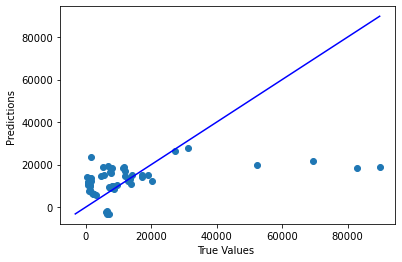

In [9]:
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

In [10]:
err=[err]

import csv

df = pd.read_csv("err.csv")
df["MLR"] = err
df.to_csv("err.csv", index=False)